In [ ]:
# 1. use sober filter to detech horizontal edges,vertical edges and both edges.
# 2. same question using canny filter
# 3. explore an use of log(Laplacian of gausiaan  )
# 4. explore an use of harris corner detection
# 5. explore an use of SIFT(scale invariant feature Transformation)
# 6. apply various filter bank to detect texture in the image
# 7. assuming that your task is to classify images into 3 classes :
# 	extract features from the image using various feature extraction technique.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Load the image
image = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)

In [18]:
# Apply Sobel filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Magnitude of both edges


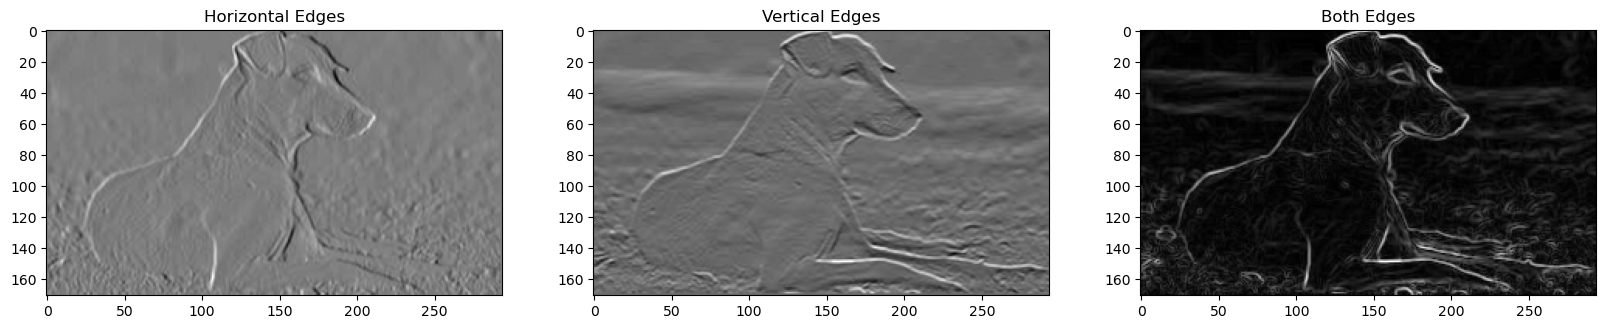

In [20]:

# Plot the results
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Horizontal Edges')
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Vertical Edges')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Both Edges')
plt.show()


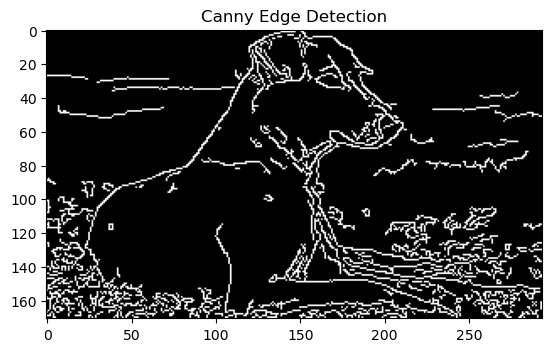

In [10]:
# Apply Canny edge detection
canny_edges = cv2.Canny(image, 100, 200)

# Plot the result
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


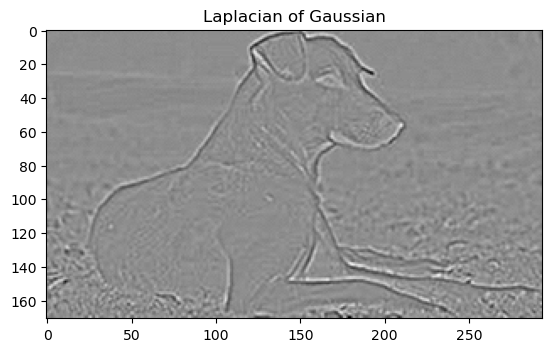

In [11]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image, (3, 3), 0)

# Apply Laplacian operator
log_edges = cv2.Laplacian(blurred, cv2.CV_64F)

# Plot the result
plt.imshow(log_edges, cmap='gray')
plt.title('Laplacian of Gaussian')
plt.show()


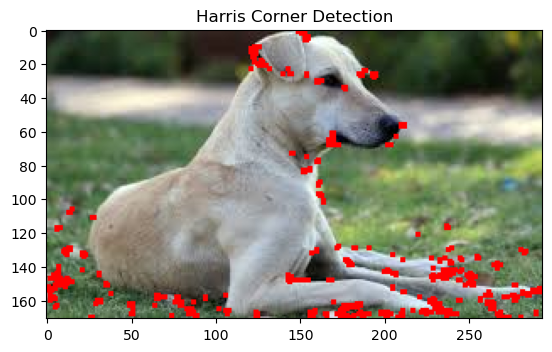

In [13]:
# Convert to float32 for Harris corner detection
gray = np.float32(image)

# Apply Harris corner detection
harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate to mark the corners
harris_corners = cv2.dilate(harris_corners, None)

# Mark corners in red on the original image
image_harris = cv2.imread('dog.jpg')
image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Show result
plt.imshow(cv2.cvtColor(image_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.show()


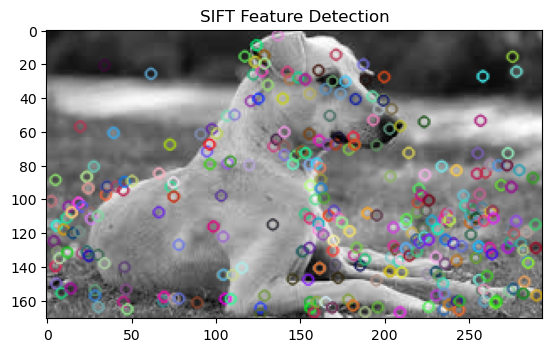

In [14]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw keypoints
image_sift = cv2.drawKeypoints(image, keypoints, None)

# Show result
plt.imshow(image_sift, cmap='gray')
plt.title('SIFT Feature Detection')
plt.show()


c:\Users\prash\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


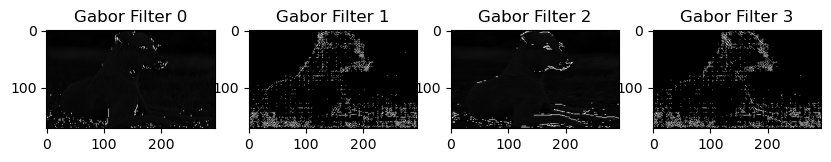

In [15]:
from skimage.filters import gabor

# Apply Gabor filters with different orientations and frequencies
filtered_images = []
for theta in [0, np.pi/4, np.pi/2, 3*np.pi/4]:  # Different angles
    gabor_filtered, _ = gabor(image, frequency=0.6, theta=theta)
    filtered_images.append(gabor_filtered)

# Plot results
plt.figure(figsize=(10, 5))
for i, filtered_img in enumerate(filtered_images):
    plt.subplot(1, 4, i+1)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Gabor Filter {i}')
plt.show()


In [16]:
# Feature Extraction using Histogram of Oriented Gradients (HOG)
from skimage.feature import hog

# Compute HOG features
hog_features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Feature Extraction using SIFT
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image, None)

# Feature Extraction using Gabor Filters
gabor_features, _ = gabor(image, frequency=0.6)

# Concatenating feature vectors for classification
features = np.hstack([hog_features, descriptors.flatten()[:100], gabor_features.flatten()[:100]])

# Print feature shape
print("Feature vector shape:", features.shape)


Feature vector shape: (25400,)
